## Heap sort


Sorted inplace
- Worst Case:    O(n log n)  
- Best Case:     O(n log n)  
- Average Case:  O(n log n)  

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from tqdm import trange
import seaborn as sns; sns.set()

In [2]:
# n is size of heap 
def heapify(arr, N, idx):
    largest = idx # Initialize largest as root 
    left = 2 * idx + 1     # left = 2*i + 1 
    right = left + 1     # right = 2*i + 2 
    
    #compare wirh a child
    if left < N and arr[idx] < arr[left]: 
        largest = left     
    if right < N and arr[largest] < arr[right]: 
        largest = right
    #swap
    if largest != idx: 
        arr[idx], arr[largest] = arr[largest],arr[idx] # swap 
        heapify(arr, N, largest) 
        
def heap_sort(arr): 
    N = len(arr) 
    # Build a maxheap.
    for i in range(N, -1, -1): 
        heapify(arr, N, i) 
        
    for i in range(N-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 
  # Driver code to test above 


# This code is contributed by Mohit Kumra 

### Selection sort

Sorted inplace
- Worst Case: O($n^2$)
- Best Case: O($n^2$)
- Average Case: O($n^2$) 

In [3]:
def selection_sort(A):
    for i in range(len(A)): 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j         
        A[i], A[min_idx] = A[min_idx], A[i]


#### Сравнение алгоритмов сортировки для массива разной длины

In [4]:
def meusure_time(fun, A, lenghts = [1000]):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    N = 3 # по какому брать среднее
    
    for i in tqdm(lenghts): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(A[:i])
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas

In [6]:
k = 1000
A = np.random.rand(100*k)
B = A.copy()

In [18]:
k = 1000
lenghts1 = [i for i in range(k,100*k,5*k)] # 1 000 000
mas_1 = meusure_time(heap_sort, A ,lenghts1)
#mas_2 = meusure_time(selection_sort, B, lenghts)




100%|██████████████████████████████████████████| 20/20 [01:16<00:00,  6.92s/it]

In [17]:
k = 100
lenghts2 = [i for i in range(k,100*k,5*k)]
mas_2 = meusure_time(selection_sort, B, lenghts2)


100%|██████████████████████████████████████████| 20/20 [05:37<00:00, 37.28s/it]

In [9]:
sns.set()

[0.01726939 0.13049272 0.25590539 0.38721376 0.52249458 0.66078037
 0.80148504 0.94421468 1.08868605 1.23468562 1.38204657 1.53063498
 1.68034094 1.83107265 1.98275224 2.13531284 2.2886964  2.44285205
 2.59773486 2.75330483]


Text(0.5, 1.0, 'Heap_sort для разной длины массива')

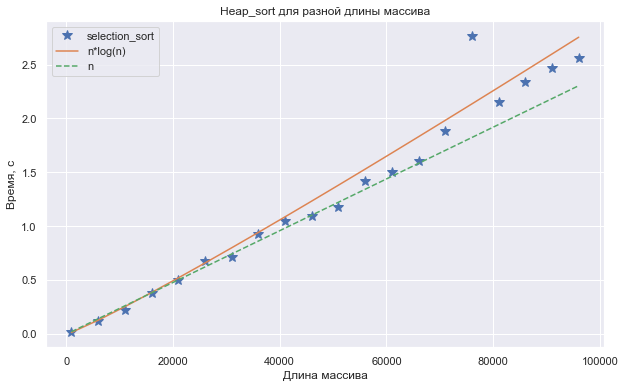

In [59]:
asym = lenghts1*np.log(lenghts1)/1000000*2.5
asym_2 = 2.4*np.array(lenghts1)/100000
print(asym)
plt.figure(figsize = (10,6))
plt.plot(lenghts1, mas_1, '*', label='selection_sort', ms=10)
plt.plot(lenghts1, asym, label ='n*log(n)')
plt.plot(lenghts1, asym_2, '--',label ='n')
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Heap_sort для разной длины массива')

[2.0000e-03 7.2000e-02 2.4200e-01 5.1200e-01 8.8200e-01 1.3520e+00
 1.9220e+00 2.5920e+00 3.3620e+00 4.2320e+00 5.2020e+00 6.2720e+00
 7.4420e+00 8.7120e+00 1.0082e+01 1.1552e+01 1.3122e+01 1.4792e+01
 1.6562e+01 1.8432e+01]


Text(0.5, 1.0, 'Сравнение selection_sort vs heap_sort для разной длины массива. Selection sort')

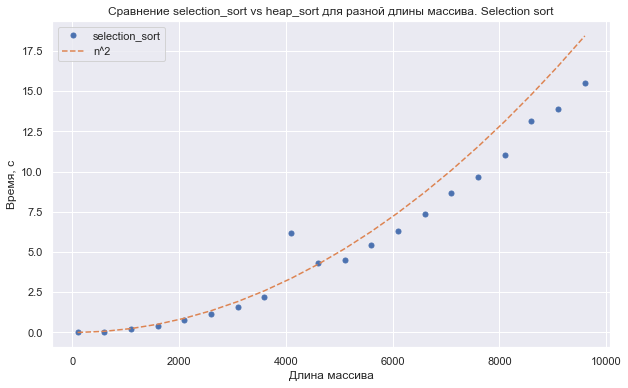

In [58]:

asym = np.array(lenghts)**2/10000000*2
print(asym)
plt.figure(figsize = (10,6))
plt.plot(lenghts2, mas_2, '.', label='selection_sort', ms=10)
plt.plot(lenghts2, asym, '--', label='n^2' )
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Selection_sort ля разной длины массива')

### Сравнение по степени отсортированности массивов

In [180]:
def bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] > mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]     
def create_table(N):
    """Create inverse sorted massive
    and take bubble to normal sorted massive
    Output: (N, N)
    """
    Mas = np.zeros((N,N))
    Mas[:,0] = np.arange(N, 0, -1)
    for i in range(1,N):
        Mas[:,i] = Mas[:,i-1]
        bubble(Mas[:,i])
    return Mas


In [184]:
Mas_1 = create_table(10000)
print(Mas_1.shape)
print(Mas_1[:10,0], Mas_1[:10,-1])

(10000, 10000)
[10000.  9999.  9998.  9997.  9996.  9995.  9994.  9993.  9992.  9991.] [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [185]:
def meusure_time_2(fun, table):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    N = 3 # по какому брать среднее
    
    for i in tqdm(range(table.shape[1])): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(table[:, i])
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas

In [187]:

matrix = Mas_1[:,::200]
print(matrix.shape)
array1 = meusure_time_2(heap_sort, matrix)


(10000, 50)











  0%|                                                   | 0/50 [00:00<?, ?it/s]








  2%|▊                                          | 1/50 [00:00<00:29,  1.65it/s]








  4%|█▋                                         | 2/50 [00:01<00:29,  1.63it/s]








  6%|██▌                                        | 3/50 [00:02<00:33,  1.41it/s]








  8%|███▍                                       | 4/50 [00:02<00:31,  1.47it/s]








 10%|████▎                                      | 5/50 [00:03<00:32,  1.38it/s]








 12%|█████▏                                     | 6/50 [00:04<00:31,  1.39it/s]








 14%|██████                                     | 7/50 [00:05<00:31,  1.38it/s]








 16%|██████▉                                    | 8/50 [00:05<00:30,  1.36it/s]








 18%|███████▋                                   | 9/50 [00:06<00:28,  1.42it/s]








 20%|████████▍                                 | 10/50 [00:07<00:27,  1.44it/s]








 22%|█████████▏        

Text(0.5, 1.0, 'Heap_sort для разных массивов (1000, 100). ')

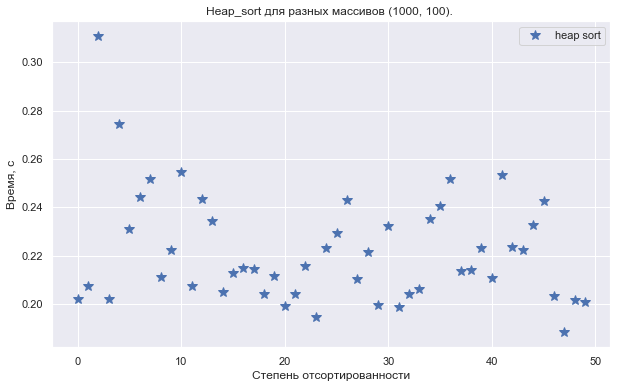

In [188]:

plt.figure(figsize = (10,6))
plt.plot(array1, '*', label='heap sort', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.legend()
plt.title('Heap_sort для разных массивов (1000, 100). ')

In [193]:
matrix2 = Mas_1[:1500,::200]
print(matrix2.shape)
array2 = meusure_time_2(selection_sort, matrix2)

(1500, 50)












  0%|                                                   | 0/50 [00:00<?, ?it/s]









  2%|▊                                          | 1/50 [00:01<00:57,  1.17s/it]









  4%|█▋                                         | 2/50 [00:02<00:59,  1.24s/it]









  6%|██▌                                        | 3/50 [00:03<00:59,  1.27s/it]









  8%|███▍                                       | 4/50 [00:05<00:58,  1.28s/it]









 10%|████▎                                      | 5/50 [00:06<00:57,  1.29s/it]









 12%|█████▏                                     | 6/50 [00:07<00:55,  1.26s/it]









 14%|██████                                     | 7/50 [00:09<00:55,  1.29s/it]









 16%|██████▉                                    | 8/50 [00:10<00:56,  1.34s/it]









 18%|███████▋                                   | 9/50 [00:12<01:04,  1.57s/it]









 20%|████████▍                                 | 10/50 [00:14<01:01,  1.54s/it]









 22%|██████

Text(0.5, 1.0, 'Selection sort для разных массивов (1000, 100). ')

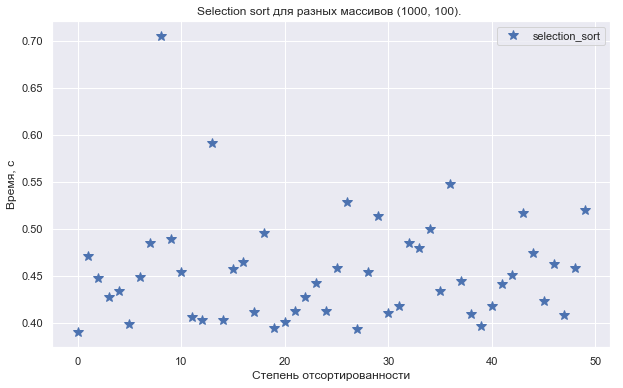

In [194]:

plt.figure(figsize = (10,6))
plt.plot(array2, '*', label='selection_sort', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.legend()
plt.title('Selection sort для разных массивов (1000, 100). ')